In [153]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [154]:
# importing kaggle dataset https://www.kaggle.com/datasets/souradippal/student-performance-prediction/data 

data = pd.read_csv('C:/Users/Anno/Documents/SQL/student_dataset - summary.csv')

data.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


### Preprocessing

In [155]:
# we can see many null values across columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [156]:
# statistical summary of each numeric field

data.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


The above summary has told us that the 'Study Hours per Week' field and 'Attendance Rate' field contain values below 0, which is not possible. We also see that 'Previous Grades' contains values above 100, which also is not possible due to the maximum grade being 100. 

Each field in our set also contains thousands of missing values. A simple dropna function erases around 25% of rows in our dataset; hence I will perform various preprocessing measures to minimise the data lost whilst rectifying these problems. 

In [157]:
# just replacing my column names with cleaner versions 

data.columns = [col.lower().replace(' ', '_') for col in data.columns]

In [158]:
# student id doesn't provide us with any meaningful information for a student wide analysis so can be dropped

data = data.drop('student_id', axis = 1)

In [159]:
# values below 0 and above 100 in the respective columns will be replaced with null values

data['study_hours_per_week'] = data['study_hours_per_week'].where(data['study_hours_per_week'] >= 0, pd.NA)

data['attendance_rate'] = (data['attendance_rate'].where((data['attendance_rate'] >= 0) 
                           & (data['attendance_rate'] <= 100), pd.NA))

data['previous_grades'] = (data['previous_grades'].where((data['previous_grades'] >= 0) 
                           & (data['previous_grades'] <= 100), pd.NA))

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   study_hours_per_week                         37064 non-null  float64
 1   attendance_rate                              33866 non-null  float64
 2   previous_grades                              37525 non-null  float64
 3   participation_in_extracurricular_activities  38000 non-null  object 
 4   parent_education_level                       38000 non-null  object 
 5   passed                                       38000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.8+ MB


In [161]:
data.head()

,study_hours_per_week,attendance_rate,previous_grades,participation_in_extracurricular_activities,parent_education_level,passed
0,12.5,NaN,75.0,Yes,Master,Yes
1,9.3,95.3,60.6,No,High School,No
2,13.2,NaN,64.0,No,Associate,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No


In [162]:
# handling missing values of our new set for numerical columns

data['study_hours_per_week'].fillna(data['study_hours_per_week'].median(), inplace=True)

data['attendance_rate'].fillna(data['attendance_rate'].median(), inplace=True)

data['previous_grades'].fillna(data['previous_grades'].median(), inplace=True)

In [163]:
# handling missing values of the categorical columns 

(data['participation_in_extracurricular_activities']
 .fillna(data['participation_in_extracurricular_activities'].mode()[0], inplace=True))

data['parent_education_level'].fillna(data['parent_education_level'].mode()[0], inplace=True)

In [164]:
# dropping only rows with a missing pass field, we return a dataset with 38,000 of the original 40,000 rows

data.dropna(inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   study_hours_per_week                         38000 non-null  float64
 1   attendance_rate                              38000 non-null  float64
 2   previous_grades                              38000 non-null  float64
 3   participation_in_extracurricular_activities  38000 non-null  object 
 4   parent_education_level                       38000 non-null  object 
 5   passed                                       38000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 2.0+ MB


## Data Preliminary Visualisation

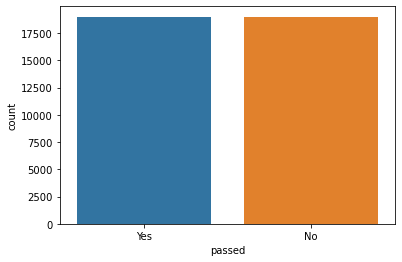

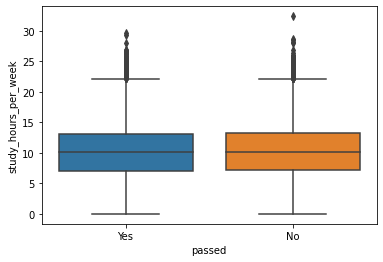

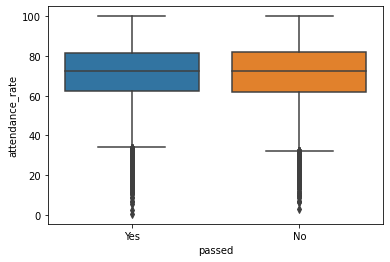

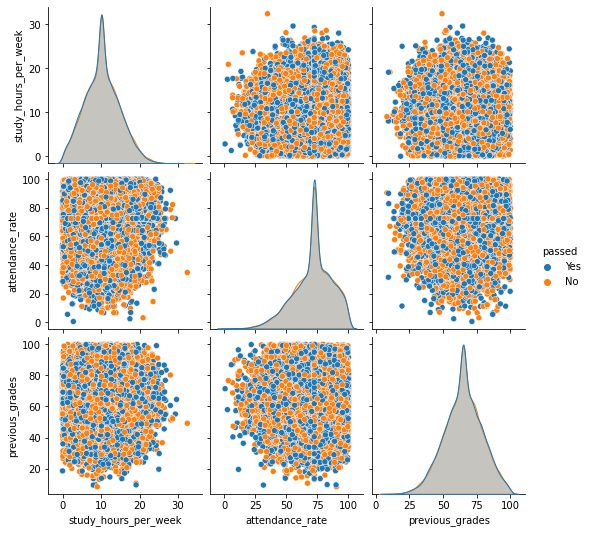

In [107]:
# distrubiton of target variable
sns.countplot(x='passed', data=data)
plt.show()

# Study hours vs Pass/Fail
sns.boxplot(x='passed', y='study_hours_per_week', data=data)
plt.show()

# Attendance Rate vs Pass/Fail
sns.boxplot(x='passed', y='attendance_rate', data=data)
plt.show()

# Pairplot to observe relationships
sns.pairplot(data, hue='passed')
plt.show()

As we are aware there are many factors outside this dataset - such as mental health and costs of student life which will ifuence the output variable. Hence I want to introduce another field - 'student_priority_ratio'. This can be calculated through: student_hours_per_week/attendance_rate. A higher ratio should indicate a prioty of self_study over attendance and visa versa.

This field aims to open discussion to accessability of classes - through subsidised transport, pushes for more robust support through government loans or potentially opening debate surrounding lesson plans and self-study resources. 

In [108]:
# dropping the feature to see results

# data['self_study_priority_ratio'] = data['study_hours_per_week']/data['attendance_rate']

Our descriptive analysis has also shown a that student study hours and student grades/attendance rate have widely different ranges. Leaving them as such would lead to these latter values holding a bias influence over our final model. Hence we will use a standardisation tool to fix this issue.

We will also use onehotencoding to allow our categorical variables to be used within analysis. 

In [137]:
data.head()

,study_hours_per_week,attendance_rate,previous_grades,participation_in_extracurricular_activities,parent_education_level,passed
0,12.5,72.4,75.0,Yes,Master,Yes
1,9.3,95.3,60.6,No,High School,No
2,13.2,72.4,64.0,No,Associate,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No


In [138]:
# define which columns need encoding or scaling 

columns_to_encode = ['participation_in_extracurricular_activities', 'parent_education_level', 'passed']
columns_to_scale = ['study_hours_per_week', 'attendance_rate', 'previous_grades']
#                     'self_study_priority_ratio']

print(columns_to_scale)

['study_hours_per_week', 'attendance_rate', 'previous_grades']


### Data Leakage

There is an issue of data leakage which can occur during the label and standardisation process. I know all the categorical variables will appear in both the testing and training data so there is no problem label encoding prior to the split. However, standardisation will have to take place after the data split.

In [139]:
# initialising and executing label encoder

from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [140]:
data.head()

,study_hours_per_week,attendance_rate,previous_grades,participation_in_extracurricular_activities,parent_education_level,passed
0,12.5,72.4,75.0,1,4,1
1,9.3,95.3,60.6,0,3,0
2,13.2,72.4,64.0,0,0,0
3,17.6,76.8,62.4,1,1,0
4,8.8,89.3,72.7,0,4,0


In [141]:
from sklearn.model_selection import train_test_split

X = data.drop(['passed'], axis=1) 
y = data['passed']

In [142]:
# utilisation of a fixed random state to ensure reproducable tests with other datasets use same random state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

In [143]:
train_data = X_train.join(y_train)

train_data

,study_hours_per_week,attendance_rate,previous_grades,participation_in_extracurricular_activities,parent_education_level,passed
38591,10.0,86.0,62.6,0,3,1
16870,5.1,56.9,79.3,0,2,1
28105,12.5,65.5,26.3,0,1,0
3019,12.8,82.2,71.2,1,2,0
30133,17.6,58.5,85.6,1,2,0
...,...,...,...,...,...,...
17760,7.1,73.1,61.8,1,4,1
6608,6.1,63.6,62.8,0,4,1
11893,8.6,91.5,80.9,1,1,1
906,3.2,84.5,63.2,0,2,1


In [145]:
# initiating StandardScaler and applying to the relevant columns

scaler = StandardScaler()

for column in columns_to_scale:
    X_train[column] = scaler.fit_transform(X_train[[column]])

In [146]:
y_train

38591    1
16870    1
28105    0
3019     0
30133    0
        ..
17760    1
6608     1
11893    1
906      1
16652    1
Name: passed, Length: 30400, dtype: int32

### Random Forest

I trialled different feature selections within the forest. The best reseult was achieved with these fields: the data is quite noisy. 

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a RandomForest Classifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions

y_pred = rf_model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5085526315789474
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      3839
           1       0.50      0.67      0.57      3761

    accuracy                           0.51      7600
   macro avg       0.51      0.51      0.50      7600
weighted avg       0.51      0.51      0.50      7600



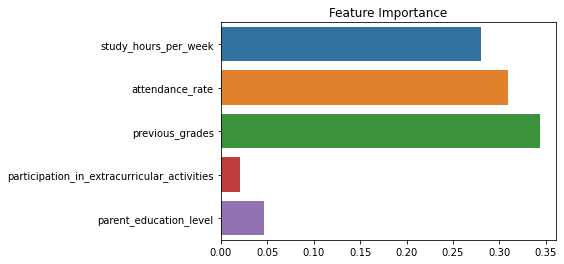

In [148]:
# Feature importance

importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance

sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

In [149]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth':[10, 20, 30],
    'max_features':[2, 4, 5]
}

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3)

grid_search.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [2, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [150]:
# estimators not listed as default is used

best_forest = grid_search.best_estimator_

In [151]:
# worse score xD

best_forest.score(X_test, y_test)

0.4968421052631579

## Conclusion

I'd be keen to get some more defined data to optimise this research; many of the parameters which have been used here barely correlate at all and bring to question how specific features should have been. Could attendance be better reflected in a grading target variable as opposed to a binary option? 

I've had a quick look at an XGBoost classifier below as well - since it can usually pull off higher accuracy for similar tasks, but wasn't able to achieve much difference.

In [171]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [201]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer

train_xgb = xgb.DMatrix(X_train, label = y_train)
test_xgb = xgb.DMatrix(X_test, label = y_test)

params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:hinge',
    
}

epochs = 100

XGB_model = xgb.train(params,train_xgb,epochs)

XGB_prediction = XGB_model.predict(test_xgb)

accuracy_score(y_test, XGB_prediction)



0.49592105263157893